In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv("C:/Users/Mohan/Documents/placement analysis/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
df_aug = pd.read_csv("C:/Users/Mohan/Documents/placement analysis/insurance.csv")
#sex
le = LabelEncoder()
le.fit(df_aug.sex.drop_duplicates()) 
df_aug.sex = le.transform(df_aug.sex)
# smoker or not
le.fit(df_aug.smoker.drop_duplicates()) 
df_aug.smoker = le.transform(df_aug.smoker)
#region
le.fit(df_aug.region.drop_duplicates()) 
df_aug.region = le.transform(df_aug.region)


In [6]:
df_aug.corr()['charges'].sort_values()


region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

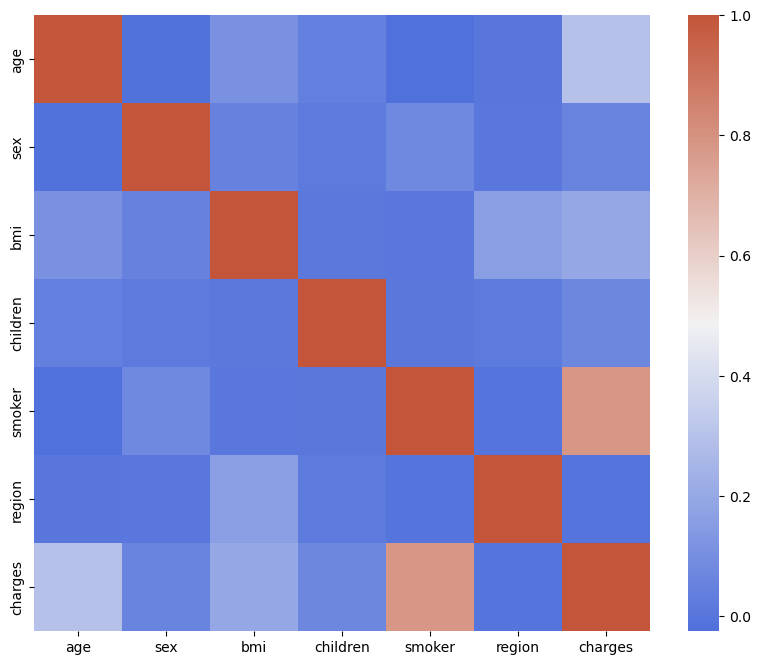

In [7]:
f, ax = pl.subplots(figsize=(10, 8))
corr = df_aug.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(260 ,20,as_cmap=True),
            square=True, ax=ax)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

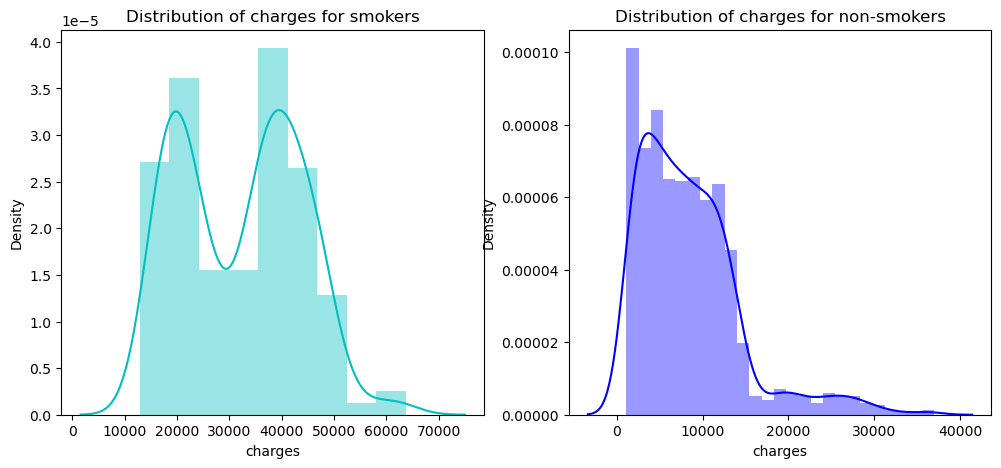

In [8]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df_aug[(df_aug.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df_aug[(df_aug.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')


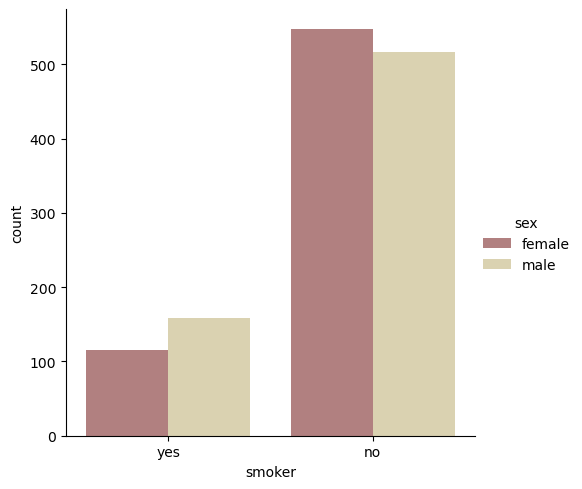

In [9]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)


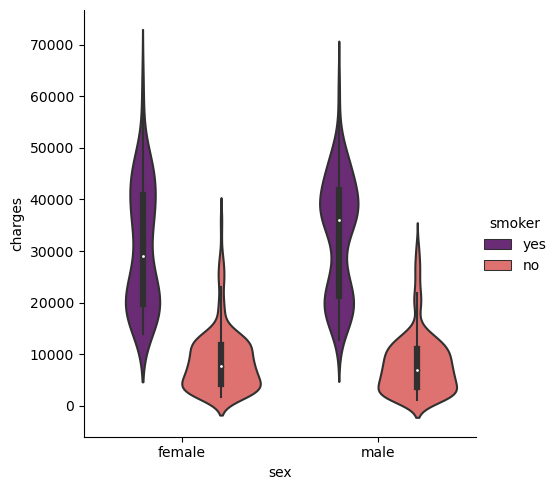

In [10]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')


<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

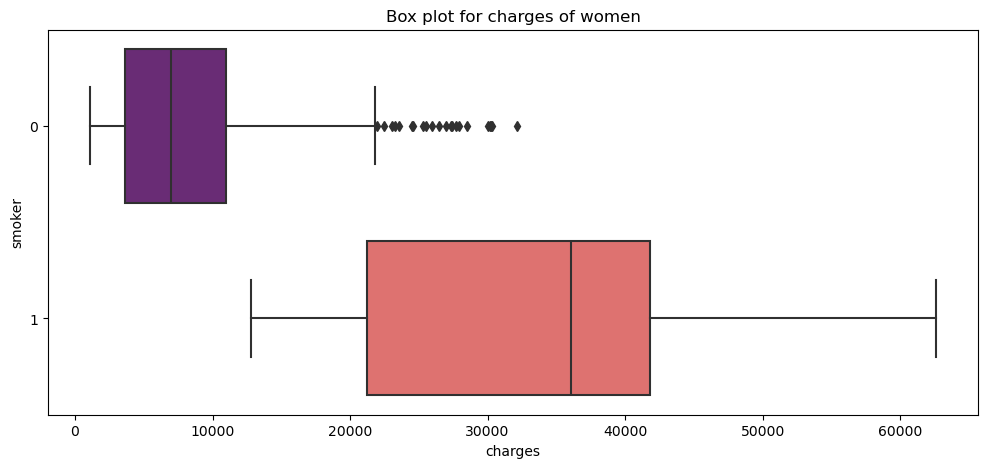

In [11]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df_aug[(df_aug.sex == 1)] , orient="h", palette = 'magma')


<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

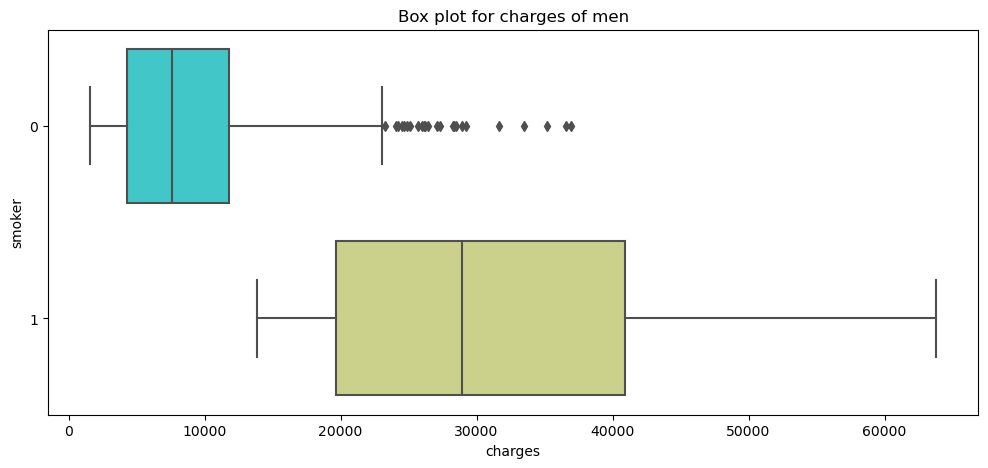

In [12]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df_aug[(df_aug.sex == 0)] , orient="h", palette = 'rainbow')


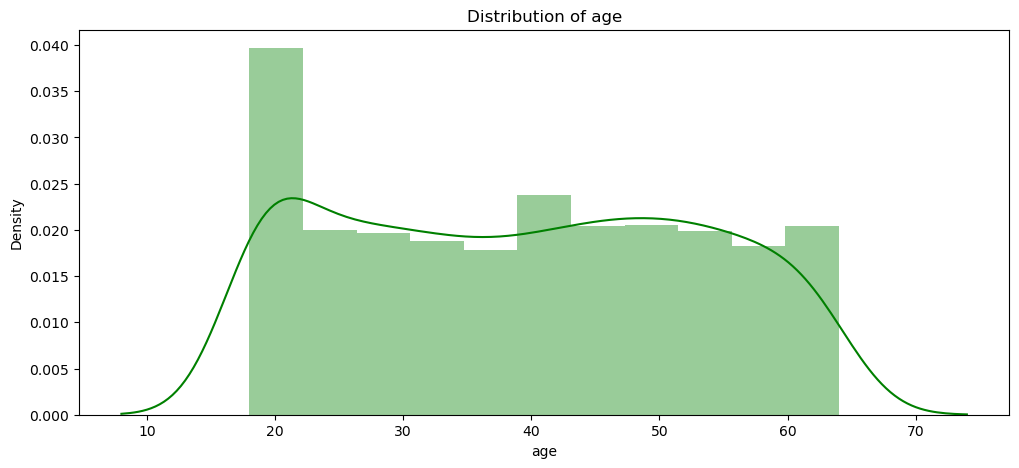

In [13]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(df_aug["age"], color = 'g')


Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

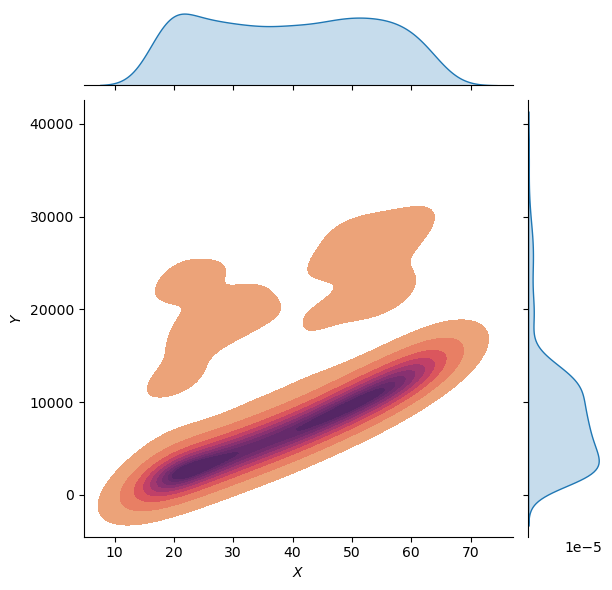

In [14]:
g = sns.jointplot(x="age", y="charges", data = df_aug[(df_aug.smoker == 0)],kind="kde", fill=True, cmap= "flare")
g.plot_joint(pl.scatter, c="w", s=0, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')


Text(0.5, 1.0, 'Distribution of charges and age for smokers')

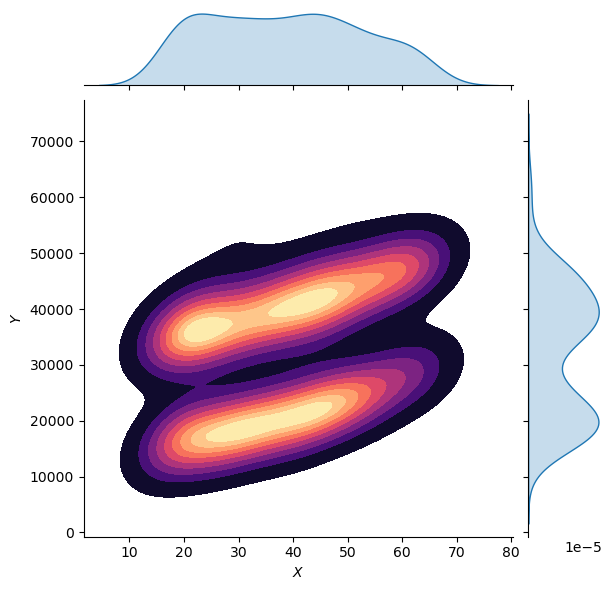

In [15]:
g = sns.jointplot(x="age", y="charges", data = df_aug[(df_aug.smoker == 1)],kind="kde", fill=True, cmap="magma")
g.plot_joint(pl.scatter, c="w", s=0, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')


Text(0.5, 1.0, 'Smokers and non-smokers')

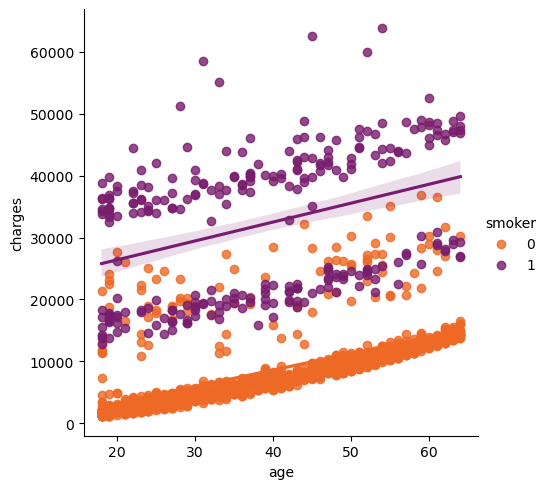

In [16]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df_aug, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')


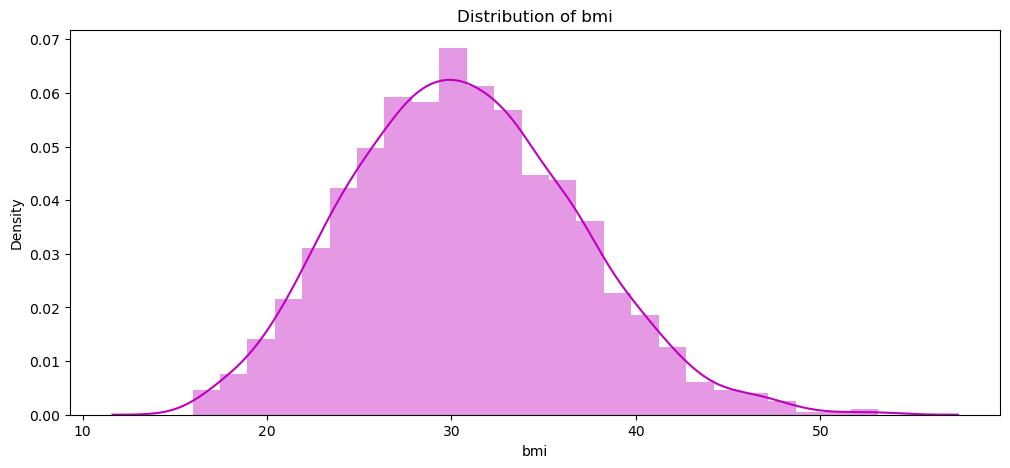

In [17]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')


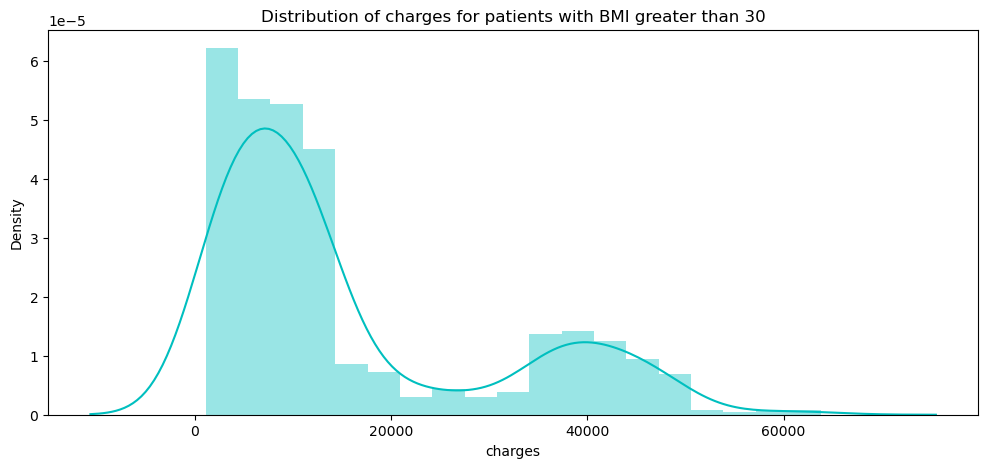

In [18]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'c')


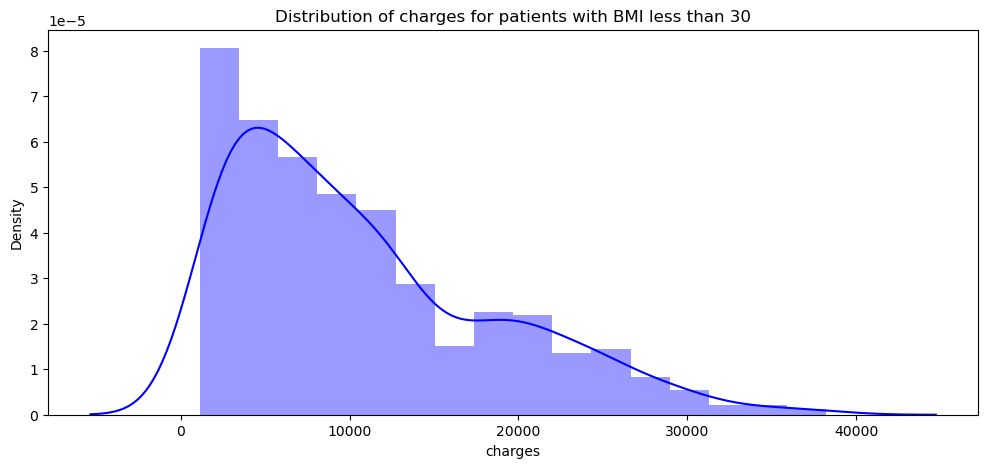

In [19]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')


Text(0.5, 1.0, 'Distribution of bmi and charges')

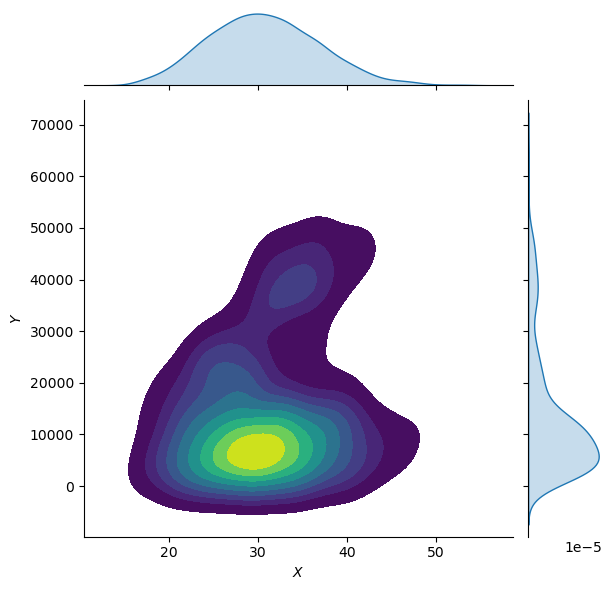

In [20]:
g = sns.jointplot(x="bmi", y="charges", data = df,kind="kde", fill = True, cmap = 'viridis')
g.plot_joint(pl.scatter, c="w", s=0, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


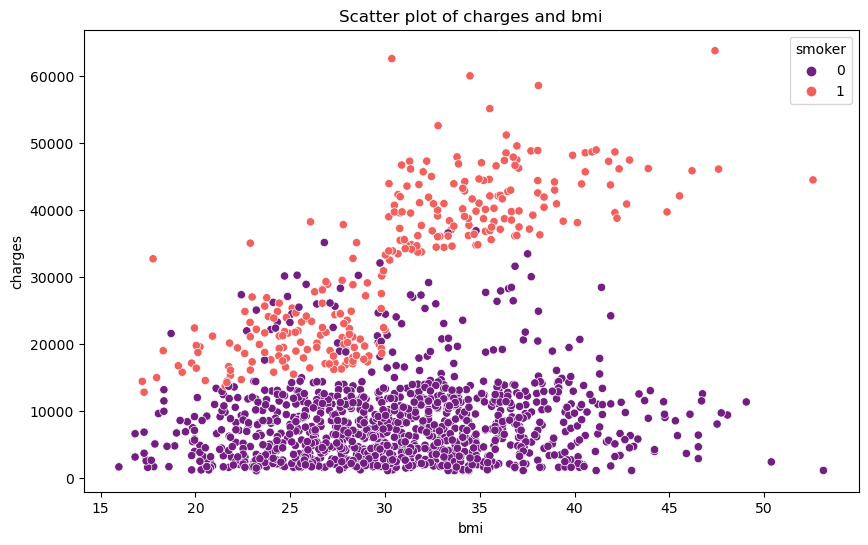

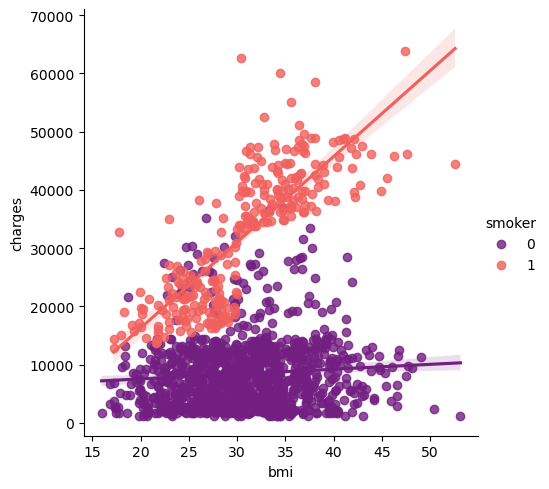

In [21]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df_aug,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df_aug, palette = 'magma')


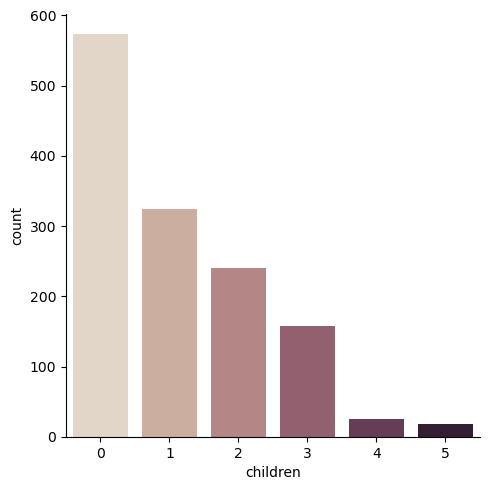

In [22]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=df_aug)


Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

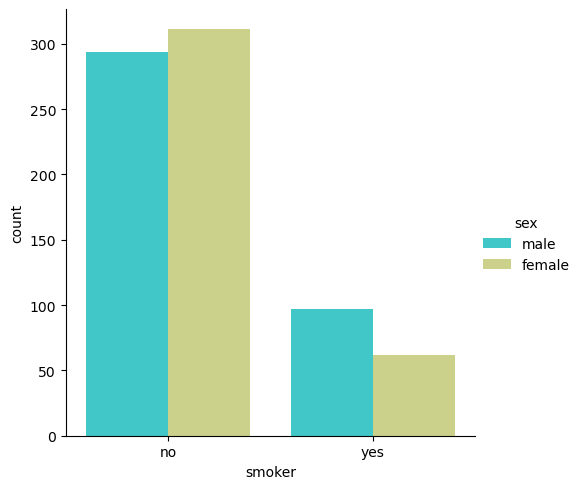

In [23]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [25]:
x = df_aug.drop(['charges'], axis = 1)
y = df_aug.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))


0.7962732059725786


In [26]:
X = df_aug.drop(['charges','region'], axis = 1)
Y = df_aug.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))


0.884919734414723
